In [82]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


Visualizacion del conjunto de datos

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

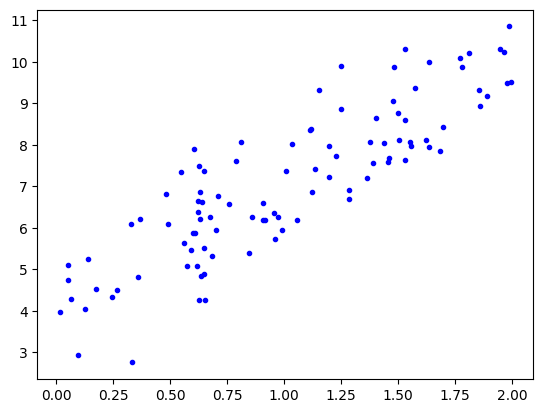

In [84]:
plt.plot(X,y, "b.")
plt.show()

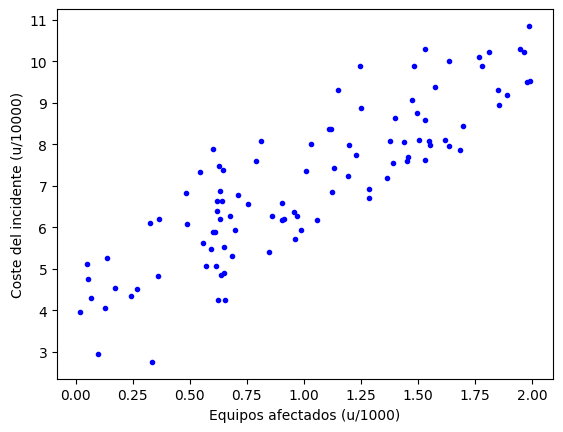

In [85]:
plt.plot(X,y,"b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

Modificacion del conjutno de datos

In [86]:
import pandas as pd

In [87]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()  }
df = pd.DataFrame(data)
df.head(20)

,n_equipos_afectados,coste
0,1.696687,8.430984
1,0.592359,5.466785
2,0.790465,7.607756
3,1.457483,7.691503
4,1.438988,8.055112
5,1.123273,6.859781
6,1.856720,8.939742
7,1.620433,8.109145
8,1.853255,9.319346
9,0.636843,4.843272


In [88]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,1696,84309
1,592,54667
2,790,76077
3,1457,76915
4,1438,80551
5,1123,68597
6,1856,89397
7,1620,81091
8,1853,93193
9,636,48432


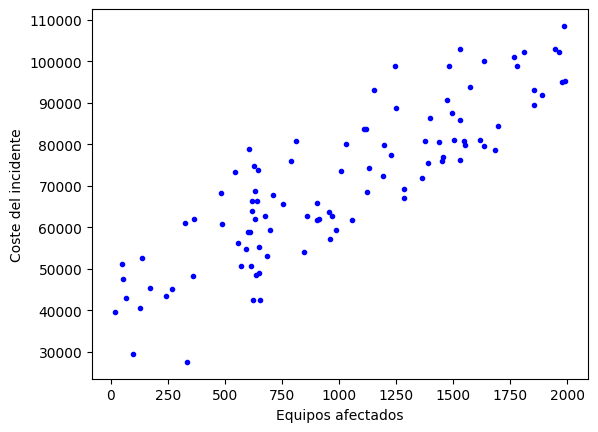

In [89]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

4. Construccion del Modelo

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)

LinearRegression()

In [92]:
# Parámetro theta 0
lin_reg.intercept_

41261.265952823785

In [93]:
#Paranetro theta 1
lin_reg.coef_

array([29.22965946])

In [94]:
# Prediccion para el valor minimo y maximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [ df["n_equipos_afectados"].max()  ] ] )
y_train_pred = lin_reg.predict(X_min_max)

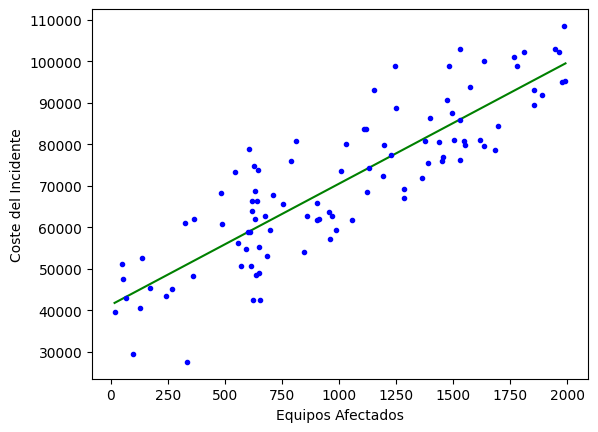

In [95]:
# Representacion grafica de la funcion hipotesis generada
plt.plot(X_min_max, y_train_pred, "g-"  )
plt.plot( df["n_equipos_afectados"], df["coste"], "b."   )
plt.xlabel("Equipos Afectados")
plt.ylabel("Coste del Incidente")
plt.show()

5. Prediccion de nuevos ejemplos

In [96]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 79259 €


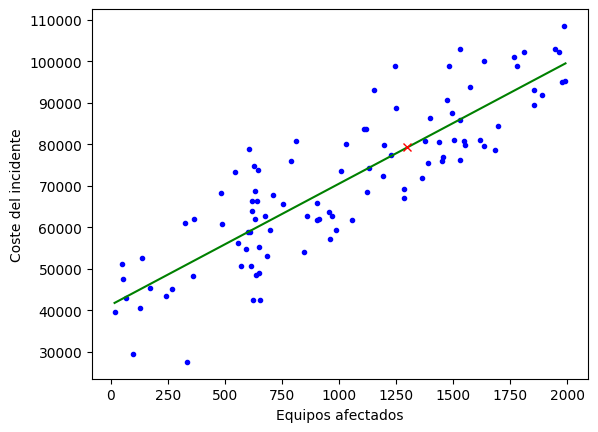

In [101]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()